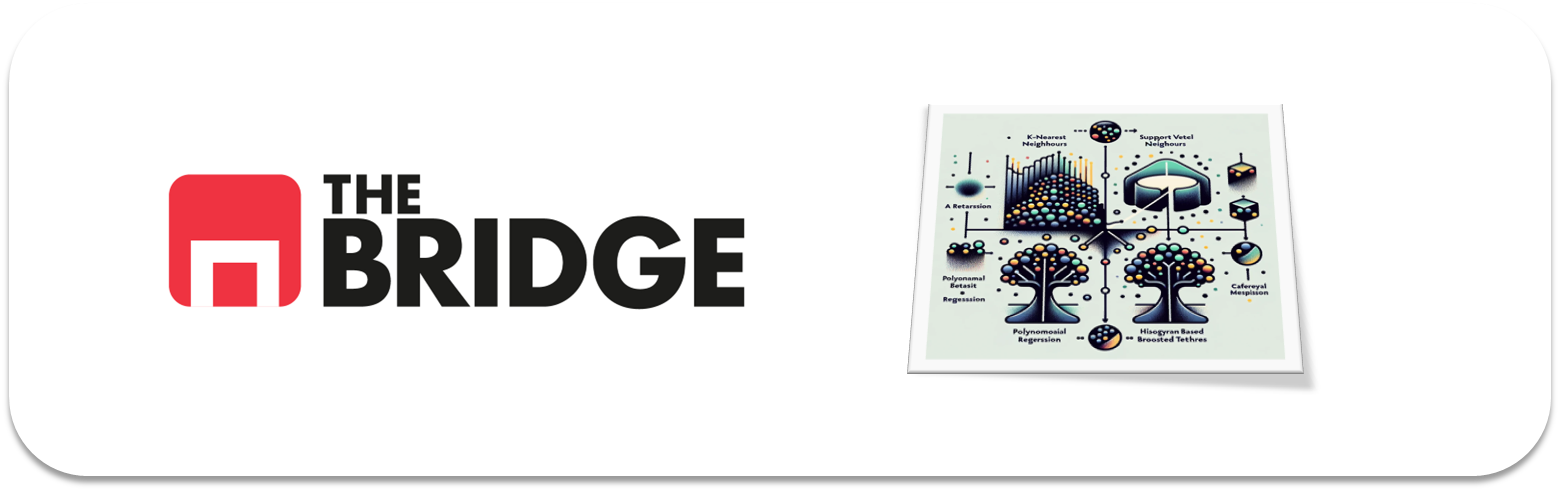

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [4]:
df = pd.read_csv("./data/credit_npo.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [10]:
#Hay dos categorias con missing MonthlyIncome y NumberOfDependents. La que más preocupa es Monthly por la cantidad de missings.
# En principio todas son numéricas, voy a consultar  el tipo de dato de cada columna para ver si hay alguna que no sea numérica y además la cantidad de valores unicos por categoria

In [13]:
'''
Posible descripción de las categorías, sacado de internte tal cual:
SeriousDlqin2yrs: Incumplimiento grave en los últimos dos años.
RevolvingUtilizationOfUnsecuredLines: Tasa de utilización de líneas de crédito no aseguradas (revolving credit).
Age: Edad de la persona.
NumberOfTime30-59DaysPastDueNotWorse: Número de veces que el individuo ha estado entre 30 y 59 días de mora.
DebtRatio: Proporción de deuda (relación entre los pagos mensuales de deuda y los ingresos).
MonthlyIncome: Ingreso mensual.
NumberOfOpenCreditLinesAndLoans: Número de líneas de crédito y préstamos abiertos.
NumberOfTimes90DaysLate: Número de veces que el individuo ha estado 90 días o más tarde en el pago.
NumberRealEstateLoansOrLines: Número de préstamos o líneas de crédito relacionados con bienes raíces.
NumberOfTime60-89DaysPastDueNotWorse: Número de veces que el individuo ha estado entre 60 y 89 días de mora.
NumberOfDependents: Número de dependientes.
'''

'\nPosible descripción de las categorías, sacado de internte tal cual:\nSeriousDlqin2yrs: Incumplimiento grave en los últimos dos años (variable objetivo, binaria).\nRevolvingUtilizationOfUnsecuredLines: Tasa de utilización de líneas de crédito no aseguradas (revolving credit).\nAge: Edad de la persona.\nNumberOfTime30-59DaysPastDueNotWorse: Número de veces que el individuo ha estado entre 30 y 59 días de mora.\nDebtRatio: Proporción de deuda (relación entre los pagos mensuales de deuda y los ingresos).\nMonthlyIncome: Ingreso mensual.\nNumberOfOpenCreditLinesAndLoans: Número de líneas de crédito y préstamos abiertos.\nNumberOfTimes90DaysLate: Número de veces que el individuo ha estado 90 días o más tarde en el pago.\nNumberRealEstateLoansOrLines: Número de préstamos o líneas de crédito relacionados con bienes raíces.\nNumberOfTime60-89DaysPastDueNotWorse: Número de veces que el individuo ha estado entre 60 y 89 días de mora.\nNumberOfDependents: Número de dependientes.\n'

In [9]:
df.nunique()

SeriousDlqin2yrs                            2
RevolvingUtilizationOfUnsecuredLines    10764
age                                        78
NumberOfTime30-59DaysPastDueNotWorse       10
DebtRatio                               11547
MonthlyIncome                            4167
NumberOfOpenCreditLinesAndLoans            43
NumberOfTimes90DaysLate                    13
NumberRealEstateLoansOrLines               16
NumberOfTime60-89DaysPastDueNotWorse        8
NumberOfDependents                         10
dtype: int64

Me parece muy interesante la categoria SeriousDlqin2yrs al tener solo 2 valores unicos (0 y 1). Podría usarse como variable ojetivo

In [11]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,12537.000000,12537.000000,12537.000000,12537.000000,12537.000000,11816.000000,12537.000000,12537.000000,12537.000000,12537.000000,12360.000000
mean,0.068916,0.330359,52.079445,0.409588,1.902253,6864.815420,8.482332,0.259312,0.999202,0.228364,0.822087
std,0.253321,0.368148,15.077498,4.055787,9.122216,11855.905437,5.165422,4.035658,1.134325,4.018873,1.136802
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030651,41.000000,0.000000,0.142268,3498.750000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.163490,51.000000,0.000000,0.302025,5416.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582219,62.000000,0.000000,0.506725,8300.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,6.000000,101.000000,98.000000,99.000000,702500.000000,49.000000,98.000000,19.000000,98.000000,10.000000


Tipos de variables:  
*Categóricas*: "SeriousDlqin2yrs" (variable binaria).  
*Numéricas continuas*: "RevolvingUtilizationOfUnsecuredLines", "age", "DebtRatio", "MonthlyIncome".  
*Numéricas discretas*: Variables relacionadas con eventos de mora ("NumberOfTime30-59DaysPastDueNotWorse", 
"NumberOfTimes90DaysLate", etc.), "NumberOfOpenCreditLinesAndLoans", "NumberRealEstateLoansOrLines", y "NumberOfDependents".

Hay variables que tienen outliers, por ejemplo NumberOfTime60-89DaysPastDueNotWorse

### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target?

In [15]:
# valorar la viabilidad de dar un credito a alguien, diria que la interesante sería SeriousDlqin2yrs

### #1.3
Pinta la distribución de frecuencias del target y coméntala

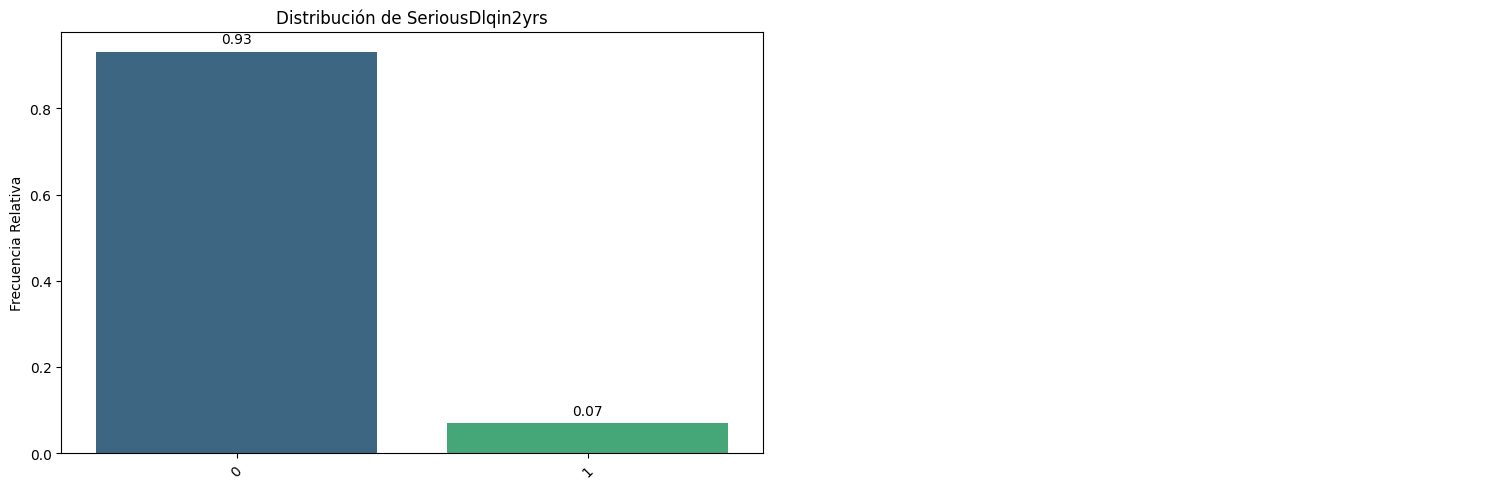

In [18]:
bt.pinta_distribucion_categoricas(df, ["SeriousDlqin2yrs"], mostrar_valores= True, relativa= True)
# La misma que en el workout

In [ ]:
# Claramente está desbalanceado. La mayoría de la gente no ha tenido impagos en los últimos 2 años. 

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [22]:
# División de los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
train_set, test_set = train_test_split(df, test_size =.2, random_state= 42)


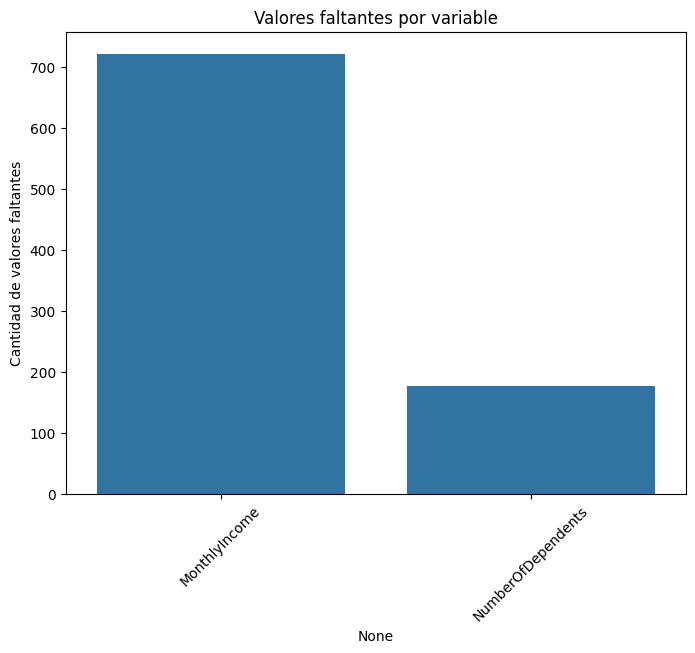

In [24]:
# Tratar las variables que tienen missings
# Ver la cantidad de missings por variable
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Gráfico de valores faltantes
plt.figure(figsize=(8, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Valores faltantes por variable')
plt.ylabel('Cantidad de valores faltantes')
plt.xticks(rotation=45)
plt.show()

In [28]:
# Imputamos faltantes de MonthlyIncome con la mediana
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

# Imputamos faltantes de NumberOfDependents con la moda
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0])

In [33]:
# Modelado entrenamiento y prueba

# Añadir valores faltantes de MonthlyIncome con la mediana
train_set['MonthlyIncome'] = train_set['MonthlyIncome'].fillna(train_set['MonthlyIncome'].median())
test_set['MonthlyIncome'] = test_set['MonthlyIncome'].fillna(test_set['MonthlyIncome'].median())

# Añadir valores faltantes de NumberOfDependents con la moda
train_set['NumberOfDependents'] = train_set['NumberOfDependents'].fillna(train_set['NumberOfDependents'].mode()[0])
test_set['NumberOfDependents'] = test_set['NumberOfDependents'].fillna(test_set['NumberOfDependents'].mode()[0])

Análisis del dataset

<Figure size 1000x600 with 0 Axes>

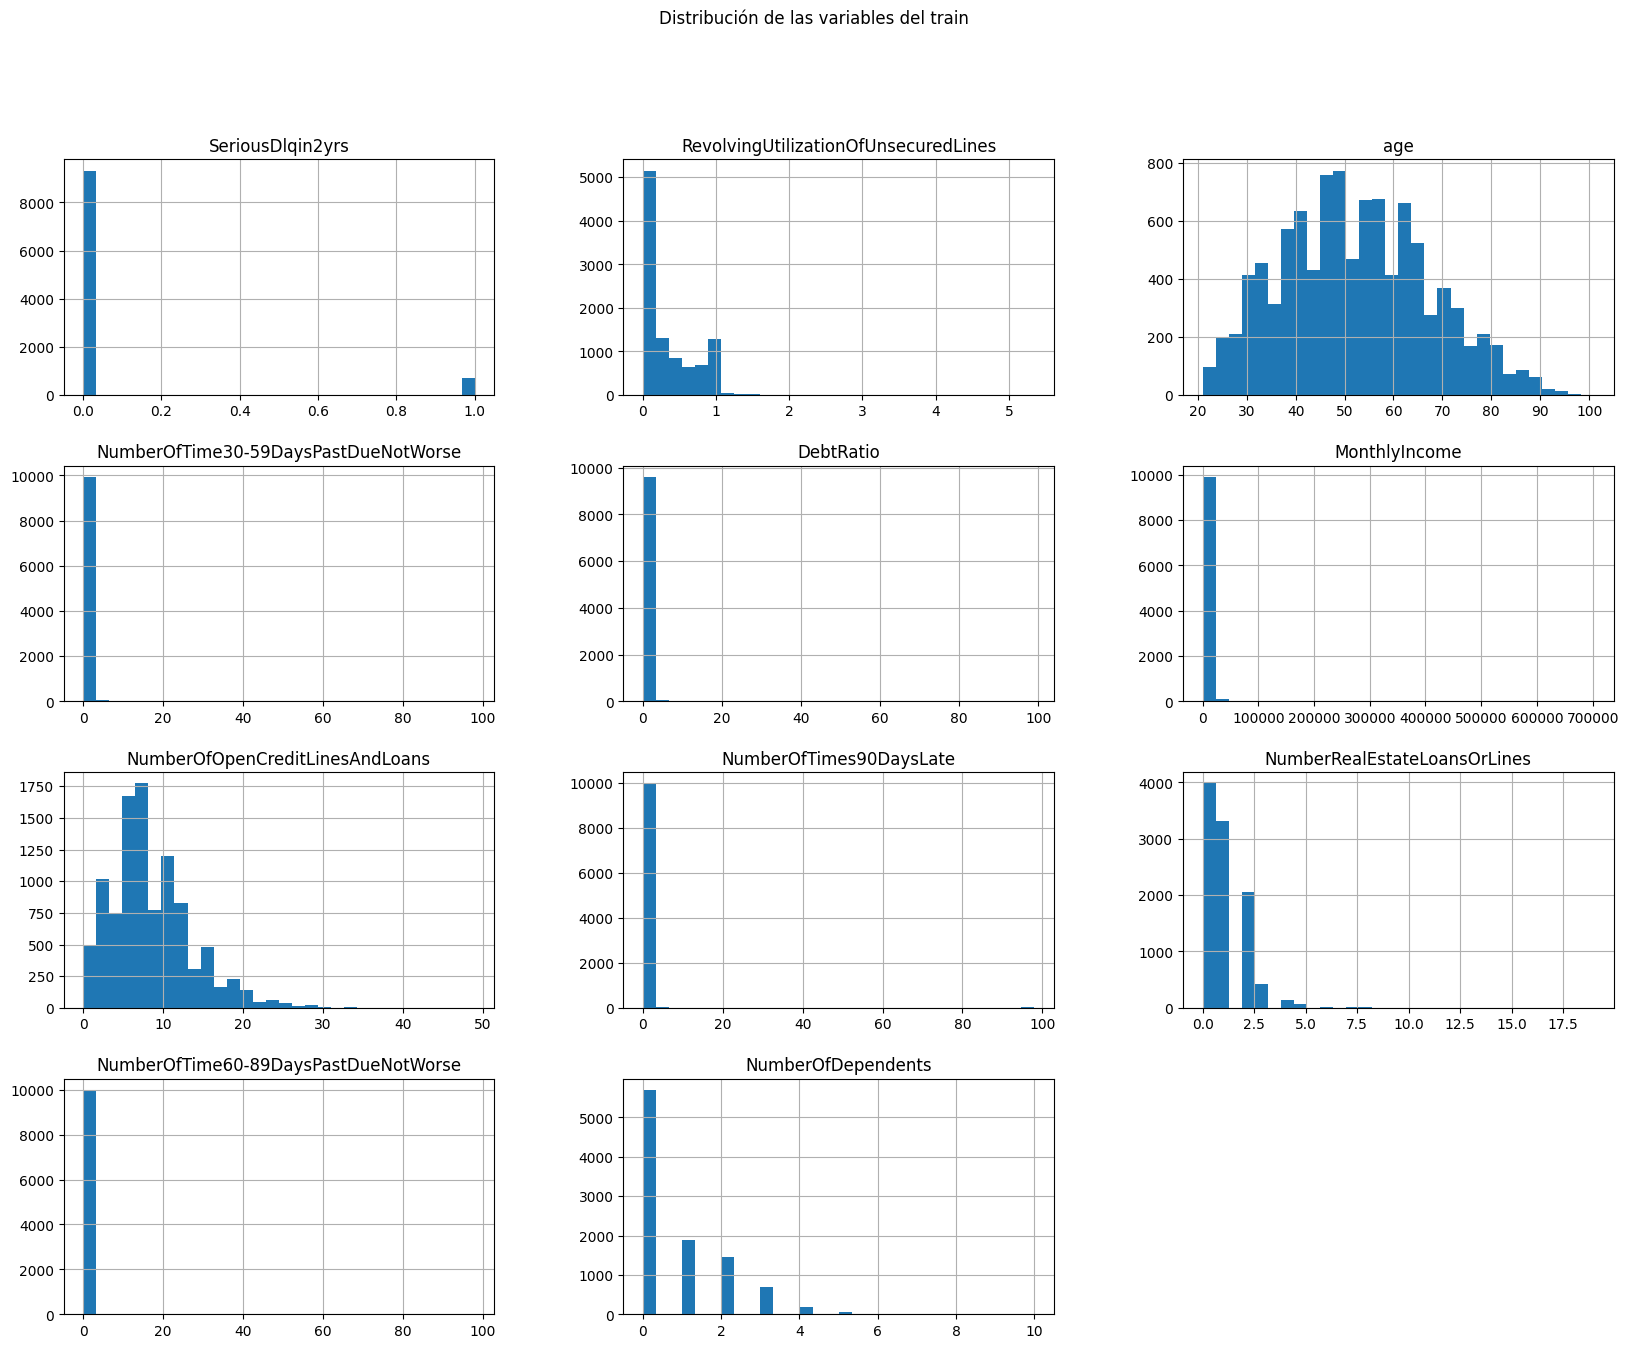

In [35]:
# Distribución del conjunto de entrenamiento después de la imputación
plt.figure(figsize = (10,6))
train_set.hist(bins = 30, figsize = (20,15))
plt.suptitle('Distribución de las variables del train')
plt.show()

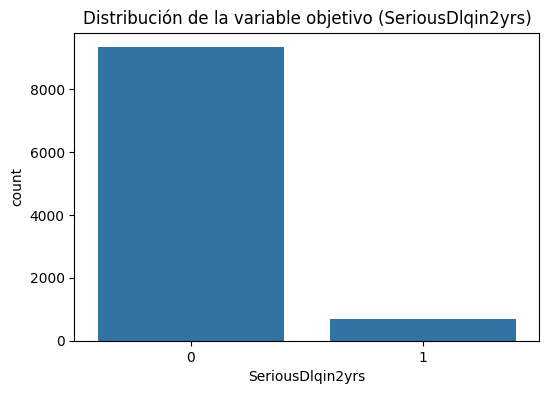

In [36]:
# Distribución del tarjet (SeriousDlqin2yrs)
plt.figure(figsize = (6,4))
sns.countplot(x ='SeriousDlqin2yrs', data = train_set)
plt.title('Distribución de la variable objetivo (SeriousDlqin2yrs)')
plt.show()

In [37]:
# Correlación features y tarjet
correlation_matrix = train_set.corr()

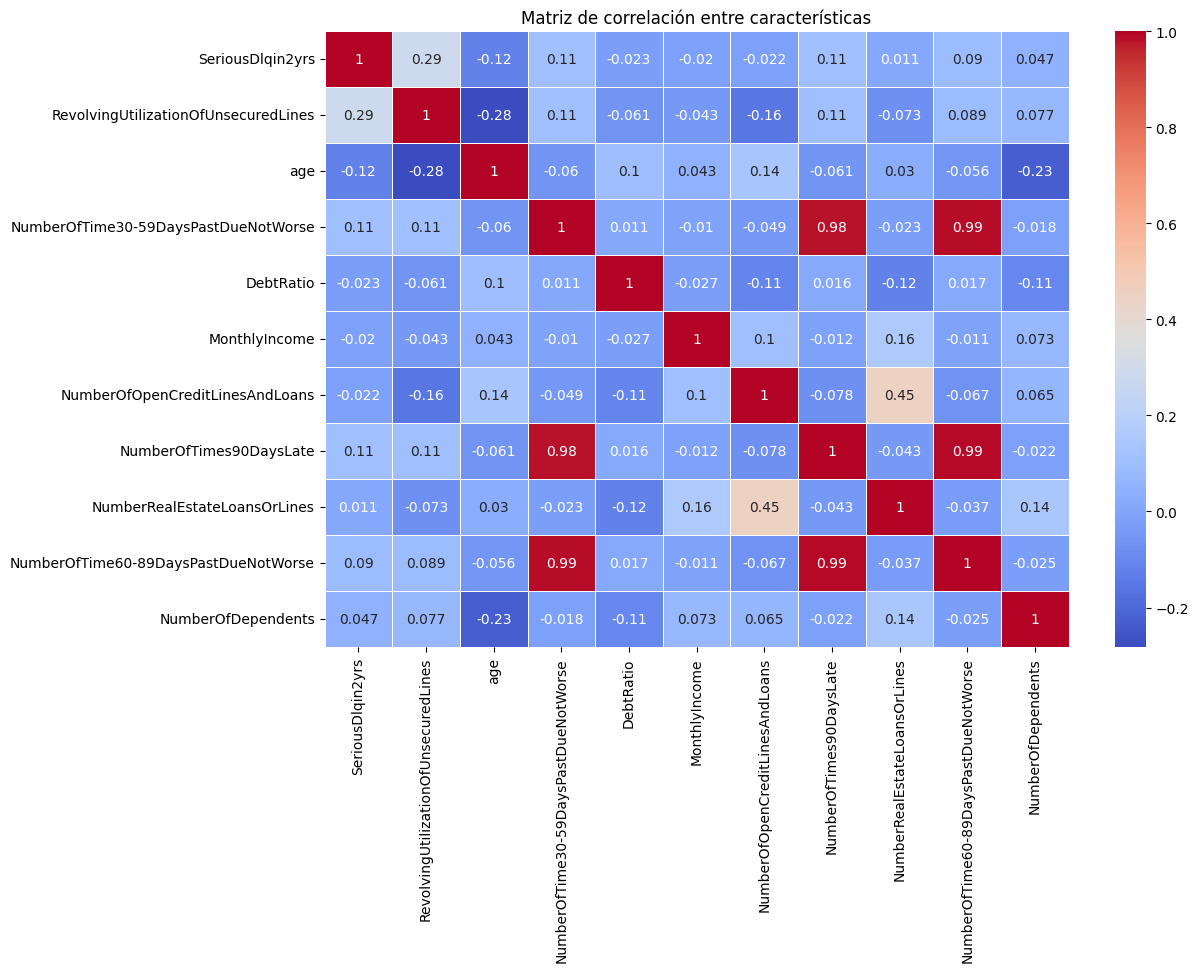

In [39]:
# Gráfica de la matriz de correlación
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Matriz de correlación entre características')
plt.show()